# Session 1 : Training your first aircraft classifier with pytorch

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" align="left" src="https://i.creativecommons.org/l/by-nc-sa/4.0/80x15.png" /></a>&nbsp;| Florient Chouteau | <a href="https://supaerodatascience.github.io/deep-learning/">https://supaerodatascience.github.io/deep-learning/</a>

## Intro

The objectives of this session is to apply what you learned during [the previous class on Deep Learning](https://supaerodatascience.github.io/deep-learning/) on a real dataset of satellite images.

Most of the vocabulary and concepts of Deep Learning and Convolutionnal Neural Network has been defined on the class linked above so you should refer to it.

In this session you will:
- Train a basic NN on a basic dataset
- Plot ROC curve & confusion matrix to diagnose your dataset

During session 2 you will be experimenting with harder datasets

If you haven't done so, go to the previous notebooks to get a hands on pytorch and CNNs

In [100]:
%matplotlib inline

In [101]:
# Put your imports here
import numpy as np
from matplotlib import pyplot as plt

## Dataset

Récupération et exploration du datset

In [102]:
# Configuration variables
TOY_DATASET_URL = "https://storage.googleapis.com/fchouteau-isae-deep-learning/toy_aircraft_dataset.npz"

### Image (reminders)

A digital image is an image composed of picture elements, also known as pixels, each with finite, discrete quantities of numeric representation for its intensity or gray level that is an output from its two-dimensional functions fed as input by its spatial coordinates denoted with x, y on the x-axis and y-axis, respectively.

We represent images as matrixes,

Images are made of pixels, and pixels are made of combinations of primary colors (in our case Red, Green and Blue). In this context, images have chanels that are the grayscale image of the same size as a color image, made of just one of these primary colors. For instance, an image from a standard digital camera will have a red, green and blue channel. A grayscale image has just one channel.

In geographic information systems, channels are often referred to as raster bands.

![img](https://static.packt-cdn.com/products/9781789613964/graphics/e91171a3-f7ea-411e-a3e1-6d3892b8e1e5.png)


For the rest of this workshop we will use the following axis conventions for images

![conventions](https://storage.googleapis.com/fchouteau-isae-deep-learning/static/image_coordinates.png)

### Downloading the dataset

We will be using [numpy datasources](https://docs.scipy.org/doc/numpy/reference/generated/numpy.DataSource.html?highlight=datasources) to download the dataset. DataSources can be local files or remote files/URLs. The files may also be compressed or uncompressed. DataSource hides some of the low-level details of downloading the file, allowing you to simply pass in a valid file path (or URL) and obtain a file object.

The dataset is in npz format which is a packaging format where we store several numpy arrays in key-value format

Note:
If you get an error with the code below run:
```python
!gsutil -m cp -r gs://isae-deep-learning/toy_aircraft_dataset.npz /tmp/storage.googleapis.com/isae-deep-learning/toy_aircraft_dataset.npz
```
in a cell above the cell below

In [103]:
ds = np.DataSource(destpath="/tmp/")
f = ds.open(TOY_DATASET_URL, "rb")

toy_dataset = np.load(f)
trainval_images = toy_dataset["train_images"]
trainval_labels = toy_dataset["train_labels"]
test_images = toy_dataset["test_images"]
test_labels = toy_dataset["test_labels"]

### A bit of data exploration

**Q1. Labels counting**

a. What is the dataset size ?

b. How many images representing aircrafts ?

c. How many images representing backgrounds ?

d. What are the dimensions (height and width) of the images ? What are the number of channels ?

2688 images in training set
896 images in testing set
1344 images representing aircrafts in training set
448 images representing aircrafts in testing set
1344 images representing backgrounds in training set
448 images representing backgrounds in testing set


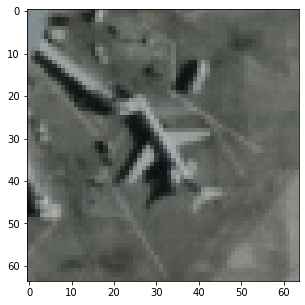

shape of images is : (64, 64, 3)


In [104]:
# a. What is the dataset size

print(str(toy_dataset["train_labels"].size) + " images in training set")
print(str(toy_dataset["test_labels"].size) + " images in testing set")

# b. how many images representing aricrafts
print(str(sum(toy_dataset["train_labels"])) + " images representing aircrafts in training set")
print(str(sum(toy_dataset["test_labels"])) + " images representing aircrafts in testing set")

# c. How many images representing backgrounds
print(str(sum([1 for x in toy_dataset["train_labels"] if x < 1])) + " images representing backgrounds in training set")
print(str(sum([1 for x in toy_dataset["test_labels"] if x < 1])) + " images representing backgrounds in testing set")
# Half of images are representing aircrafts and the other half represents backgrounds

# d. What are dimensions of images? number of channels 

img_index = 0
img1 = toy_dataset["train_images"][img_index]
label1 = toy_dataset["train_labels"][img_index]
plt.figure(figsize=(5, 5))
plt.imshow(img1)
plt.show()

print("shape of images is : " + str(img1.shape))

**Q2. Can you plot at least 8 examples of each label ? In a 4x4 grid ?**

In [105]:
aircrafts = []
backgrounds = []
example_images = []

index = 0

while(len(aircrafts) < 8 or len(backgrounds) < 8):
    if toy_dataset["train_labels"][index] == 1 :
        if len(aircrafts) < 8 : 
            aircrafts.append(toy_dataset["train_images"][index])
    if toy_dataset["train_labels"][index] == 0 : 
        if len(backgrounds) < 8:
            backgrounds.append(toy_dataset["train_images"][index])
    index += 1 #on regarde l'image suivante

print("aircrafts : " + str(len(aircrafts)))
print("backgrounds : " + str(len(backgrounds)))
    
example_images = aircrafts + backgrounds
example_labels = ["aircraft"]*8 + ["background"]*8
print(len(example_images))


aircrafts : 8
backgrounds : 8
16


Here are some examples that help you answer this question. Try them and make your own. A well-understandood dataset is the key to an efficient model.

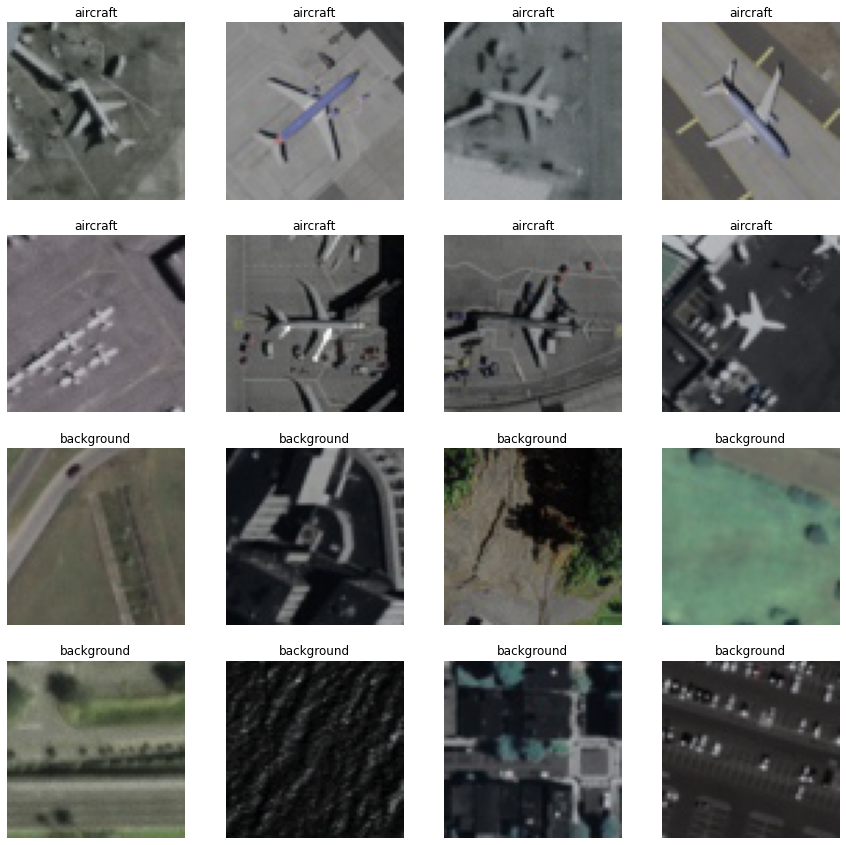

In [106]:
fig, axs = plt.subplots(4, 4, figsize=(15,15))

for nb in range(len(example_images)):
    i = nb // 4
    j = nb  % 4
    axs[i,j].axis('off')
    axs[i,j].imshow(example_images[nb])
    axs[i,j].set_title(example_labels[nb])

In [107]:
import cv2
import matplotlib.pyplot as plt

In [108]:
LABEL_NAMES = ["Not an aircraft", "Aircraft"]

print("Labels counts :")
for l, c, label in zip(*np.unique(trainval_labels, return_counts=True), LABEL_NAMES):
    print(f" Label: {label} , value: {l}, count: {c}")

for l, label in enumerate(LABEL_NAMES):
    print(f"Examples shape for label {l} : {trainval_images[trainval_labels == l, ::].shape}")

Labels counts :
 Label: Not an aircraft , value: 0, count: 1344
 Label: Aircraft , value: 1, count: 1344
Examples shape for label 0 : (1344, 64, 64, 3)
Examples shape for label 1 : (1344, 64, 64, 3)


In [109]:
LABEL_NAMES = ["Not an aircraft", "Aircraft"]

print("Labels counts :")
for l, c, label in zip(*np.unique(test_labels, return_counts=True), LABEL_NAMES):
    print(f" Label: {label} , value: {l}, count: {c}")

for l, label in enumerate(LABEL_NAMES):
    print(f"Examples shape for label {l} : {test_images[test_labels == l, ::].shape}")

Labels counts :
 Label: Not an aircraft , value: 0, count: 448
 Label: Aircraft , value: 1, count: 448
Examples shape for label 0 : (448, 64, 64, 3)
Examples shape for label 1 : (448, 64, 64, 3)


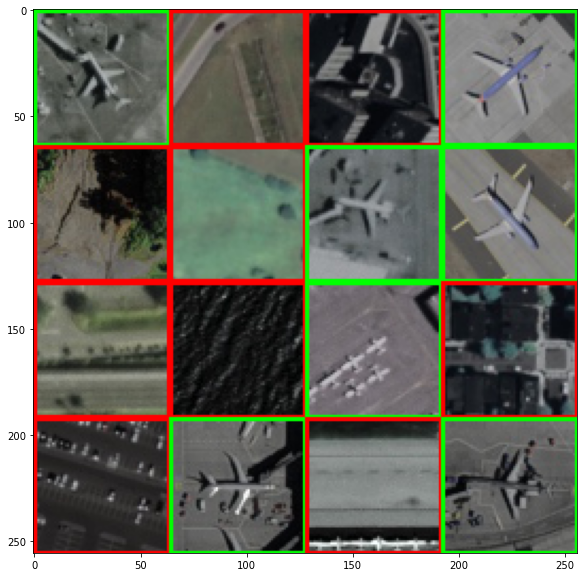

In [110]:
grid_size = 4
grid = np.zeros((grid_size * 64, grid_size * 64, 3)).astype(np.uint8)
for i in range(grid_size):
    for j in range(grid_size):
        tile = np.copy(trainval_images[i * grid_size + j])
        label = np.copy(trainval_labels[i * grid_size + j])
        color = (0, 255, 0) if label == 1 else (255, 0, 0)
        tile = cv2.rectangle(tile, (0, 0), (64, 64), color, thickness=2)
        grid[i * 64 : (i + 1) * 64, j * 64 : (j + 1) * 64, :] = tile

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(grid)
plt.show()

### A bit about train-test

You just downloaded a training and a test set.

- We use the training set for forward/backward
- We use the validation set to tune hyperparameters (optimizers, early stopping)
- We use the test set for final metrics on our tuned model

![](https://i.stack.imgur.com/osBuF.png)

For more information as to why we use train/validation and test refer to these articles:

- https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7
- https://www.freecodecamp.org/news/what-to-do-when-your-training-and-testing-data-come-from-different-distributions-d89674c6ecd8/
- https://kevinzakka.github.io/2016/09/26/applying-deep-learning/

We will now create our validation dataset,

Since we know the dataset is balanced, we can evenly sample from the dataset without taking too many risks

We will do a 80/20 sampling

In [111]:
idxs = np.random.permutation(np.arange(trainval_images.shape[0]))

train_idxs, val_idxs = idxs[: int(0.8 * len(idxs))], idxs[int(0.8 * len(idxs)) :]

train_images = trainval_images[train_idxs]
train_labels = trainval_labels[train_idxs]
val_images = trainval_images[val_idxs]
val_labels = trainval_labels[val_idxs]

In [112]:
train_images.shape

(2150, 64, 64, 3)

What is the mean of our data ? 
Whats is the standard deviation ?

In [113]:
# Compute the dataset statistics in [0.,1.], we're going to use it to normalize our data

mean = np.mean(train_images, axis=(0, 1, 2)) / 255.0
std = np.std(train_images, axis=(0, 1, 2)) / 255.0

mean, std

(array([0.33014054, 0.34238622, 0.32331922]),
 array([0.16917338, 0.1662306 , 0.16388656]))

## Preparing our training

Remember that training a deep learning model requires:

- Defining a model to train
- Defining a loss function (cost function) to compute gradients with
- Defining an optimizer to update parameters
- Putting the model on the accelerator device that trains very fast (GPU, TPU)... You'll learn about GPUs later :)

![](https://pbs.twimg.com/media/E_1d06cVIAcYheX?format=jpg)

The training loop is "quite basic" : We loop over samples of the dataset (in batches) several times over :

![](https://pbs.twimg.com/media/E_1d06XVcA8Dhzs?format=jpg)


In [114]:
from typing import Callable

import torch
import torch.nn.functional as F
from PIL import Image
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms

### Defining Dataset & Transforms

First, we need to tell pytorch how to load our data.

Have a look at : https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

We write our own `torch.data.Dataset` class

In [115]:
class NpArrayDataset(Dataset):
    def __init__(
        self,
        images: np.ndarray,
        labels: np.ndarray,
        image_transforms: Callable = None,
        label_transforms: Callable = None,
    ):
        self.images = images
        self.labels = labels
        self.image_transforms = image_transforms
        self.label_transforms = label_transforms

    def __len__(self):
        return self.images.shape[0]

    def __getitem__(self, index: int):
        x = self.images[index]
        y = self.labels[index]

        if self.image_transforms is not None:
            x = self.image_transforms(x)
        else:
            x = torch.tensor(x)

        if self.label_transforms is not None:
            y = self.label_transforms(y)
        else:
            y = torch.tensor(y)

        return x, y

Then we need to process our data (images) into "tensors" that torch can process, we define "transforms"

In [116]:
# transform to convert np array in range [0,255] to torch.Tensor [0.,1.]
# then normalize by doing x = (x - mean) / std
image_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean, std),
    ]
)

# here we don't have anything to do
target_transforms = None

Now we put everything together into something to load our data

In [117]:
# load the training data
train_set = NpArrayDataset(
    images=train_images, labels=train_labels, image_transforms=image_transforms, label_transforms=target_transforms
)

print(len(train_set))

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

# load the validation data
validation_set = NpArrayDataset(
    images=val_images, labels=val_labels, image_transforms=image_transforms, label_transforms=target_transforms
)

print(len(validation_set))

val_loader = DataLoader(validation_set, batch_size=64, shuffle=True)

2150
538


### Check that your dataset outputs correct data

Always to this as a sanity check to catch bugs in your data processing pipeline

Write the inverse transformation by hand to ensure it's ok

![andrej](https://storage.googleapis.com/fchouteau-isae-deep-learning/static/andrej_tweet_1.png)

Inverse transform is OK ?
Label 1


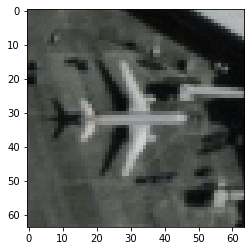

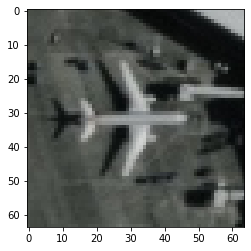

In [118]:
k = np.random.randint(len(train_set))
x, y = train_set[k]

# From torch
# Inverse transform
x = x.numpy()
x = x.transpose((1, 2, 0))
x = x * std + mean
x = x.clip(0.0, 1.0)
x = (x * 255.0).astype(np.uint8)

print("Inverse transform is OK ?")
print("Label {}".format(y))
plt.imshow(x)
plt.show()

plt.imshow(train_set.images[k])
plt.show()

Model

In [119]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(DEVICE)

cpu


### Defining a model

Now we have to define a CNN to train. It's usually called a "network", and we define its "architecture".

Defining a good architecture is a huge field of research (a pandora's box) that takes a lot of time, but we can define "sane architectures" easily:

Basically, CNN architectures are a stacks of :
- Convolution layers + non linearities
- Pooling layer
- A final "activation" layer at the end (for classification) that allows us to output probabilities

![](https://idiotdeveloper.com/wp-content/uploads/2021/05/1_uAeANQIOQPqWZnnuH-VEyw.jpg)

Let's define a model together:

```python
model = nn.Sequential(
    # A block of 2 convolutions + non linearities & a pooling layers
    # IN SHAPE (3,64,64)
    nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),
    # OUT SHAPE (16,62,62)
    nn.ReLU(),
    # IN SHAPE (16,62,62)
    nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3),
    # OUT SHAPE (16,60,60)
    nn.ReLU(),
    nn.MaxPool2d(2),
    # OUT SHAPE (16,30,30)
    # Another stack of these
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
    # OUT SHAPE (?,?,?) -> (32,28,28)
    nn.ReLU(),
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    # OUT SHAPE (?,?,?) -> (32,26,26) -> (32,24,24) -> (32,12,12)
    # Another stack of these
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
    # OUT SHAPE (?,?,?) -> (64,10,10)
    nn.ReLU(),
    nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3),
    # OUT SHAPE (?,?,?) -> (64,8,8)
    nn.ReLU(),
    nn.MaxPool2d(2),
    # OUT SHAPE (?,?,?) -> (64,4,4)
    # A final classifier
    nn.Flatten(),
    nn.Linear(in_features=4 * 4 * 64, out_features=256), # do you understand why 4 * 4 * 64 ?
    nn.ReLU(),
    nn.Dropout(p=0.25),
    nn.Linear(in_features=256, out_features=64),
    nn.ReLU(),
    nn.Dropout(p=0.25),
    nn.Linear(in_features=64, out_features=1),
    nn.Sigmoid(),
)
```

**Questions**

Knowing that the input image size is (3,64,64), go through the model step by step,

Can you fill the blanks for the shapes ?

Do you understand why ? 

In [124]:
# Let's test this !

some_model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    # Another stack of these
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    # Another stack of these
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    # A final classifier
    nn.Flatten(),
    nn.Linear(in_features=4 * 4 * 64, out_features=256),
    nn.ReLU(),
    nn.Dropout(p=0.25),
    nn.Linear(in_features=256, out_features=64),
    nn.ReLU(),
    nn.Dropout(p=0.25),
    nn.Linear(in_features=64, out_features=1),
    nn.Sigmoid(),
)

x = torch.rand((16, 3, 64, 64))  # We define an input of dimensions batch_size, channels, height, width

y = some_model(x)

print(y.shape)

# let's delete the model now, we won't need it

del some_model

torch.Size([16, 1])


Do it yourself !

In [123]:
# Let's define another model, except this time there are blanks ... it's up to you to fill them


def model_fn():
    model = nn.Sequential(
        # A first convolution block
        nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3), # (3,64,64) -> (16,62,62)
        nn.ReLU(),
        nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3), # (16,60,60)
        nn.ReLU(),
        nn.MaxPool2d(2), # (16,30,30)
        # Another stack of these
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3), # (32,28,28)
        nn.ReLU(),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3), # (32,26,26)
        nn.ReLU(),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),# (32,24,24)
        nn.ReLU(),
        nn.MaxPool2d(2), # (32,12,12)
        # A final classifier
        nn.Flatten(),
        nn.Linear(in_features=12 * 12 * 32, out_features=64),
        nn.ReLU(),
        nn.Dropout(p=0.1),
        nn.Linear(in_features=64, out_features=1),
        nn.Sigmoid(),
    )

    return model


model = model_fn()

print(model)

x = torch.rand((16, 3, 64, 64))  # We define an input of dimensions batch_size, channels, height, width

print(x.shape)

y = model(x)

print(y.shape)

# THIS CELL SHOULD NOT GIVE AN ERROR !

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (6): ReLU()
  (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (8): ReLU()
  (9): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=4608, out_features=64, bias=True)
  (14): ReLU()
  (15): Dropout(p=0.1, inplace=False)
  (16): Linear(in_features=64, out_features=1, bias=True)
  (17): Sigmoid()
)
torch.Size([16, 3, 64, 64])
torch.Size([16, 1])


Hint: The answer (and there can only be one) is :

```python
model = nn.Sequential(
    # A first convolution block
    nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    # Another stack of these
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    # A final classifier
    nn.Flatten(),
    nn.Linear(in_features=12 * 12 * 32, out_features=64),
    nn.ReLU(),
    nn.Dropout(p=0.1),
    nn.Linear(in_features=64, out_features=1),
    nn.Sigmoid(),
)
```

You should be able to understand this

In [125]:
# moving model to gpu if available
model = model.to(DEVICE)

### Defining our loss and optimizer

Check the definition of the binary cross entropy:

https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss

In [126]:
criterion = nn.BCELoss(reduction="mean")
optimizer = optim.SGD(model.parameters(), lr=1e-2)

## Training with pytorch

We will actually train the model, and plot training & validation metrics during training

In [127]:
def train_one_epoch(model, train_loader):

    epoch_loss = []

    for i, batch in enumerate(train_loader):

        # get one batch
        x, y_true = batch
        x = x.to(DEVICE)
        y_true = y_true.to(DEVICE)

        # format the y_true so that it is compatible with the loss
        y_true = y_true.view((-1, 1)).float()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        y_pred = model(x)

        # compute loss
        loss = criterion(y_pred, y_true)

        # backward
        loss.backward()

        # update parameters
        optimizer.step()

        # save statistics
        epoch_loss.append(loss.item())

        if i % 10 == 0:
            print(f"Batch {i}, curr loss = {loss.item():.03f}")

    return np.asarray(epoch_loss).mean()


def valid_one_epoch(model, valid_loader):

    epoch_loss = []

    for i, batch in enumerate(valid_loader):
        with torch.no_grad():
            # get one batch
            x, y_true = batch
            x = x.to(DEVICE)
            y_true = y_true.to(DEVICE)

            # format the y_true so that it is compatible with the loss
            y_true = y_true.view((-1, 1)).float()

            # forward
            y_pred = model(x)

            # compute loss
            loss = criterion(y_pred, y_true)

            # save statistics
            epoch_loss.append(loss.item())

    return np.asarray(epoch_loss).mean()

In [128]:
EPOCHS = 10  # Set number of epochs, example 100

# Send model to GPU
model = model.to(DEVICE)

train_losses = []
valid_losses = []

# loop over the dataset multiple times
for epoch in range(EPOCHS):
    model.train()
    train_epoch_loss = train_one_epoch(model, train_loader)
    model.eval()
    valid_epoch_loss = valid_one_epoch(model, val_loader)

    print(f"EPOCH={epoch}, TRAIN={train_epoch_loss}, VAL={valid_epoch_loss}")

    train_losses.append(train_epoch_loss)
    valid_losses.append(valid_epoch_loss)

Batch 0, curr loss = 0.693
Batch 10, curr loss = 0.699
Batch 20, curr loss = 0.692
Batch 30, curr loss = 0.692
EPOCH=0, TRAIN=0.6932673016015221, VAL=0.695141163137224
Batch 0, curr loss = 0.696
Batch 10, curr loss = 0.692
Batch 20, curr loss = 0.694
Batch 30, curr loss = 0.687
EPOCH=1, TRAIN=0.6925718433716718, VAL=0.6941397388776144
Batch 0, curr loss = 0.685
Batch 10, curr loss = 0.694
Batch 20, curr loss = 0.693
Batch 30, curr loss = 0.688
EPOCH=2, TRAIN=0.6912798881530762, VAL=0.6931259897020128
Batch 0, curr loss = 0.696
Batch 10, curr loss = 0.699
Batch 20, curr loss = 0.684
Batch 30, curr loss = 0.684
EPOCH=3, TRAIN=0.6898607383756077, VAL=0.6911534865697225
Batch 0, curr loss = 0.694
Batch 10, curr loss = 0.697
Batch 20, curr loss = 0.687
Batch 30, curr loss = 0.688
EPOCH=4, TRAIN=0.6866970798548531, VAL=0.6879979835616218
Batch 0, curr loss = 0.688
Batch 10, curr loss = 0.681
Batch 20, curr loss = 0.687
Batch 30, curr loss = 0.672
EPOCH=5, TRAIN=0.6800874103518093, VAL=0.6805

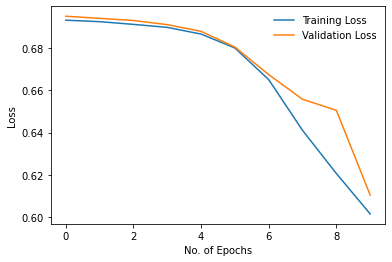

In [129]:
# Plot training / validation loss
plt.plot(train_losses, label="Training Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)
plt.show()

Save the model

In [130]:
with open("model.pt", "wb") as f:
    torch.save(model.state_dict(), f)

Now, clear the model from memory

In [131]:
del model

## Testing our models and computing metrics

Now that we have a trained network, it is important to measure how well it performs. We do not do that during training because theoretically we try to test on a context closer to how the final model will be used, meaning this can be another pipeline and is usually outside the training engine.

You can refer to your ML course or on resources on the web to see how we can measure it.

### Loading saved model

In [132]:
# Instantiate a new empty model
model = model_fn()

print(model)

# Load state
checkpoint_path = "model.pt"
model.load_state_dict(torch.load(checkpoint_path))

print("Model Loaded")

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (6): ReLU()
  (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (8): ReLU()
  (9): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=4608, out_features=64, bias=True)
  (14): ReLU()
  (15): Dropout(p=0.1, inplace=False)
  (16): Linear(in_features=64, out_features=1, bias=True)
  (17): Sigmoid()
)
Model Loaded


### Inferencing on the test dataset

Now we will run predictions on the test dataset using the newly loaded model

In [133]:
test_ds = NpArrayDataset(
    images=test_images, labels=test_labels, image_transforms=image_transforms, label_transforms=target_transforms
)

In [134]:
import tqdm

In [135]:
y_true = []
y_pred = []

# Send model to correct device
model.to(DEVICE)

# Put model in evaluatio mode (very important)
model.eval()

# Disable all gradients things
with torch.no_grad():
    for x, y_t in tqdm.tqdm(test_ds, "predicting"):
        x = x.reshape((-1,) + x.shape)
        x = x.to(DEVICE)
        y = model.forward(x)
        y = y.to("cpu").numpy()

        y_t = int(y_t.to("cpu").numpy())

        y_pred.append(y)
        y_true.append(y_t)
y_pred = np.concatenate(y_pred, axis=0)
y_true = np.asarray(y_true)

predicting: 100%|████████████████████████████████████████████████████████████████████| 896/896 [00:01<00:00, 557.91it/s]


In [136]:
print(y_pred.shape)

print(y_pred[4])

(896, 1)
[0.5890086]


In [137]:
y_pred_classes = y_pred[:, 0] > 0.5

### Confusion matrix
Here, we are first computing the [confusion matrix]():

Confusion matrix


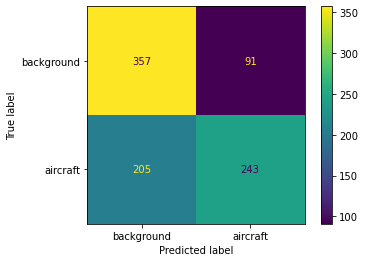

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

print("Confusion matrix")
cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["background", "aircraft"])

disp.plot()
plt.show()

### ROC curve

The next metric we are computing is the [Receiver Operating Characteristic](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html). A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The method was originally developed for operators of military radar receivers starting in 1941, which led to its name. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/512px-Roc_curve.svg.png)

![](http://algolytics.com/wp-content/uploads/2018/05/roc1_en.png)

It is used to choose a threshold on the output probability in case you are interesting in controling the false positive rate.

In [139]:
# Compute ROC curve and Area Under Curver

from sklearn.metrics import auc, roc_curve

# We round predictions for better readability
y_pred_probas = np.round(y_pred[:, 0], 2)

fpr, tpr, thresholds = roc_curve(y_true, y_pred_probas)
roc_auc = auc(fpr, tpr)

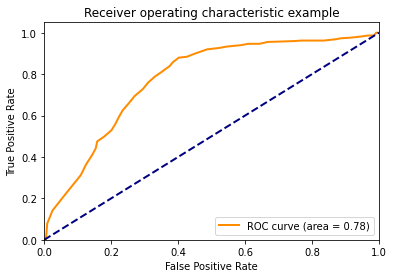

In [140]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Using the ROC curve to select an optimal threshold

The ROC curve can be used to select the best decision threshold for classifying an aircraft as positive.

Plot the ROC curve with thresholds assigned to points in the curve (you can round the predictions for a simpler curve)

/tmp/ipykernel_10082/1129522680.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred_probas = (y_pred[:, 0] / 0.05).astype(np.int) * 0.05


<Figure size 432x288 with 0 Axes>

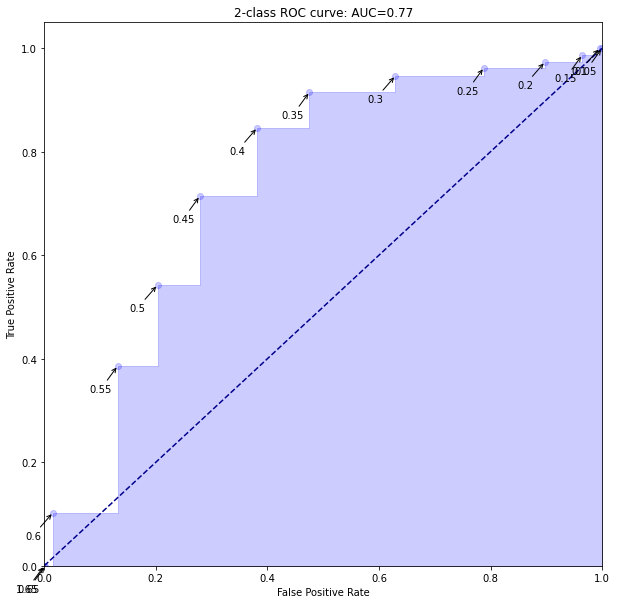

In [141]:
# We round predictions every 0.05 for readability
y_pred_probas = (y_pred[:, 0] / 0.05).astype(np.int) * 0.05

fpr, tpr, thresholds = roc_curve(y_true, y_pred_probas)
roc_auc = auc(fpr, tpr)

plt.clf()
fig = plt.figure(figsize=(10, 10))
plt.step(fpr, tpr, "bo", alpha=0.2, where="post")
plt.fill_between(fpr, tpr, alpha=0.2, color="b", step="post")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("2-class ROC curve: AUC={:0.2f}".format(roc_auc))
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")

for tp, fp, t in zip(tpr, fpr, thresholds):
    plt.annotate(
        np.round(t, 2),
        xy=(fp, tp),
        xytext=(fp - 0.05, tp - 0.05),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
    )
plt.savefig("roc_curve_thresholds.png")
plt.show()

Now, choose a threshold on the curve where you miss less than 10% of the aircrafts

Confusion matrix


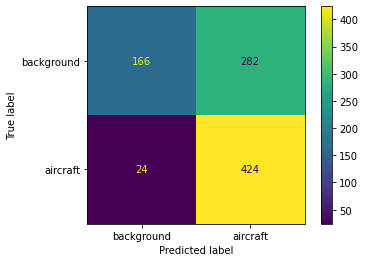

In [165]:
selected_threshold = .3

print("Confusion matrix")

y_pred_classes = y_pred_probas > selected_threshold

cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["background", "aircraft"])

disp.plot()
plt.show()

# How did the confusion matrix evolve ? Does it match your intuition ?

### Misclassified examples

It is always interesting to check mis classified examples.

It usually provides tips on how to improve your model.

306
[  1   2   6   7   8   9  10  11  17  20  22  23  27  30  32  33  42  50
  52  53  56  62  67  68  71  72  73  74  75  90  97 101 111 113 118 119
 120 121 123 126 131 133 135 138 142 143 144 146 149 151 155 157 161 168
 173 174 177 181 186 188 191 194 195 197 198 210 211 213 216 218 221 223
 224 225 227 229 230 238 246 247 249 252 255 258 273 274 277 278 279 288
 289 300 305 308 310 313 314 315 316 321 324 326 327 328 330 331 338 343
 344 345 347 351 352 358 363 365 367 374 377 379 381 383 385 388 390 396
 399 401 405 413 421 425 427 437 439 442 445 447 450 455 456 457 458 459
 461 462 465 469 470 475 479 481 482 485 486 488 492 496 497 499 502 505
 506 509 513 515 516 519 520 523 525 526 527 528 529 530 537 541 543 546
 548 550 556 558 559 562 563 567 574 576 577 584 585 586 587 588 589 590
 595 596 598 604 607 611 618 619 620 622 625 627 628 630 633 635 638 640
 641 643 644 647 651 659 660 664 666 667 668 672 675 678 682 684 686 689
 690 692 696 707 710 711 712 713 717 722 724 72

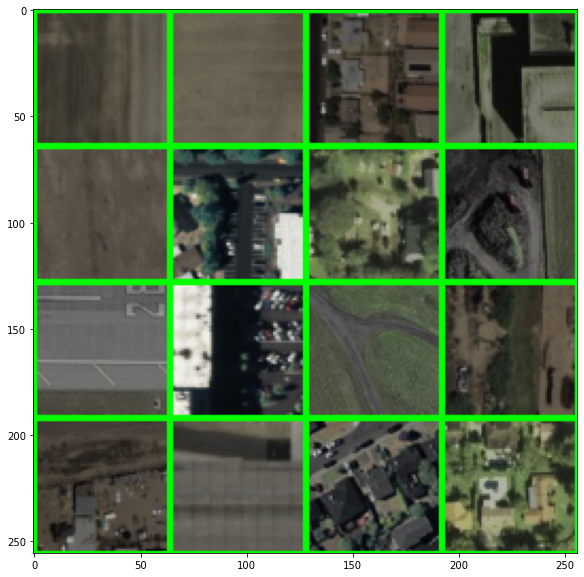

In [166]:
misclassified_idxs = np.where(y_pred_classes != y_true)[0]

print(len(misclassified_idxs))

print(misclassified_idxs)

misclassified_images = test_images[misclassified_idxs]
misclassified_true_labels = test_labels[misclassified_idxs]
misclassified_pred_labels = y_pred_classes[misclassified_idxs]

grid_size = 4
grid = np.zeros((grid_size * 64, grid_size * 64, 3)).astype(np.uint8)
for i in range(grid_size):
    for j in range(grid_size):
        img = np.copy(misclassified_images[i * grid_size + j])
        pred = np.copy(misclassified_pred_labels[i * grid_size + j])
        color = (0, 255, 0) if pred == 1 else (255, 0, 0)
        tile = cv2.rectangle(img, (0, 0), (64, 64), color, thickness=2)
        grid[i * 64 : (i + 1) * 64, j * 64 : (j + 1) * 64, :] = img

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(grid)
plt.show()

## Improving our training / validation loop

We will add more advanced features to our training loop for better models

Copy the train / valid loop and update it accordingly

### Computing accuracy during training / validation

Update the `valid_one_epoch` to compute accuracy during during the validation loop, and plot its evolution during training

Use the ROC curve computation where we compute the pred / true classes as inspiration

Here's an example (that needs to be modified)
```python

correct_pred = 0
total_pred = 0
with torch.no_grad():
    for data in valid_loader:
        images, labels = data
        outputs = net(images)
        predictions = torch.round(outputs)[:,0]
        # collect the correct predictions
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred += 1
            total_pred += 1
            
    # print accuracy
    accuracy = 100 * (total_pred / total_pred)
    print("Accuracy is: {:.1f} %".format(accuracy))

```                                             

### Best checkpoint

You've seen how to save model checkpoint. However we saved the model at the end of training. What if there is an issue (like overfitting ? or our computer crashes !!!) ? 

How to keep a good copy of our model at any point ? 

The idea is that during the training, we always save the checkpoint with the lowest valid loss.

**Modify the train loop to keep the best model state dict at any point**


In [ ]:
# Here

### Early stopping

You've seen that it is possible to overfit it you're not careful,

**Go back to your previous class and adapt the training loop to add early stopping**

In [ ]:
# Here

### Data Augmentation


One technique for training CNNs on images is to put your training data through data augmentation to generate similar-but-different examples to make your network more robust.

You can generate "augmented images" on the fly or use composition to generate data

- We are going to wrap our numpy arrays with `torch.utils.data.Dataset` class

https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#dataset-class

- Here is how we use torch Compose to augment data

https://pytorch.org/docs/stable/torchvision/transforms.html

https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms

Note: This step requires a bit of tinkering from numpy arrays to torch datasets, it's fine if you skip it. For the next notebook it may prove a useful way of gaining performance

**Remember : We apply data augmentation only during training**


In [167]:
import torch.functional as F
import torch.utils
import torchvision.transforms

In [168]:
# Example (very simple) data augmentation to get your started, you can add more transforms to this list

train_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToPILImage(),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean, std),
    ]
)

In [169]:
trainset_augmented = NpArrayDataset(
    images=train_images, labels=train_labels, image_transforms=train_transform, label_transforms=None
)

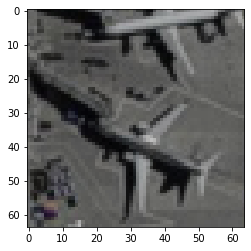

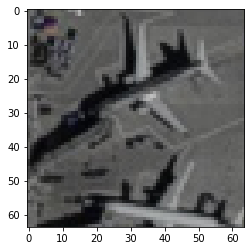

In [170]:
# Get image from dataset. Note: it has been converted as a torch tensor in CHW format in float32 normalized !
img, label = trainset_augmented[0]
img = img.numpy().transpose((1, 2, 0)) * std + mean
img = img.clip(0.0, 1.0)
img = (img * 255.0).astype(np.uint8)
plt.imshow(img)
plt.show()

# Compare effects of data augmentation
img_orig = trainset_augmented.images[0]
plt.imshow(img_orig)
plt.show()

In [ ]:
# do another training and plot our metrics again. Did we change something ?

### [Optional] ReduceLR On Plateau

Sometimes it's best to reduce the learning rate if you stop improving

Tutorial : https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/lr_scheduling/#reduce-on-loss-plateau-decay

## [Optional] Hyperparameter Tuning

If you're done with this, you can explore a little bit more : Now that we have a nice training loop we can do hyperparameter tuning !

As you can see, there are a lot of parameters we can choose:

- the optimizer
- the learning rate
- the model architecture
 
etc... !

### Optimizer Changes
Change the optimizer from SGD to optim.Adam. Is it better ? 

In [ ]:
# HERE

### Batch Normalization

One of the most used "layer" beyond conv / pool / relu is "batch normalization",

http://d2l.ai/chapter_convolutional-modern/batch-norm.html

Try adding it to your network and see what happens !

```python
def model_fn():
    model = nn.Sequential(
        # A first convolution block
        nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(2),
        # Another stack of these
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2),
        # A final classifier
        nn.Flatten(),
        nn.Linear(in_features=12 * 12 * 32, out_features=64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.1),
        nn.Linear(in_features=64, out_features=1),
        nn.Sigmoid(),
    )

    return model
```

### Trying other models

You have seen a class on different model structure,
https://supaerodatascience.github.io/deep-learning/slides/2_architectures.html#/

Now is the time to try and implement them. For example, try to write a VGG-11 with fewer filters by yourself... or a very small resnet using [this](https://github.com/a-martyn/resnet/blob/master/resnet.py) as inspiration

You can also use models from [torchvision](https://pytorch.org/docs/stable/torchvision/models.html#classification) in your loop, or as inspiration


**Modify the model structure and launch another training... Is it better ?**

In [ ]:
# HERE

### Transfer Learning

For usual tasks such as classification or detection, we use "transfer learning":

    In practice, very few people train an entire Convolutional Network from scratch (with random initialization), because it is relatively rare to have a dataset of sufficient size. Instead, it is common to pretrain a ConvNet on a very large dataset (e.g. ImageNet, which contains 1.2 million images with 1000 categories), and then use the ConvNet either as an initialization or a fixed feature extractor for the task of interest.
    
Adapt this tutorial to do transfer learning from a network available in torchvision to our use case

https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

I advise you to select resnet18

The biggest library of pretrained models is available here :

https://github.com/rwightman/pytorch-image-models

## [Optional] Next steps before the next notebooks

- Try to play with network hyperparameters. The dataset is small and allow fast iterations so use it to have an idea on hyperparameter sensitivity.
    number of convolutions, other network structures, learning rates, optimizers,...

- Example: Compare again SGD and ADAM

- Try to use the ROC curve to select a threshold to filter only negative examples without losing any positive examples

When you are done with the warmup, go to the next notebook. But remember that next datasets will be larger and you will not have the time (trainings will take longer ) to experiment on hyperparameters.

**Try more things before going to the next notebook**

## [Optional] Food for thoughts: Tooling

To conclude this notebook, reflect on the following,

You have launched different experiences and obtained different results,

Did you feel the notebook you used was sufficient ? Which tools would you like to have in order to properly run your experiments ? (Quick google search or ask someone) Do they already exist ?

### High level frameworks

<img src="https://raw.githubusercontent.com/pytorch/ignite/master/assets/logo/ignite_logo_mixed.svg" alt="ignite" style="width: 400px;"/>

Pytorch ignite is what we call a "high-level library" over pytorch, its objectives is to abstract away most of the boilerplate code for training deep neural network.

Usually, they make the development process easier by enabling you to focus on what's important instead of writing distributed and optimized training loops and plugging metrics / callbacks. Because we all forgot to call `.backward()` or `.zero_grad()` at least once.

Here an overview of the high-level libraries available for pytorch,

https://neptune.ai/blog/model-training-libraries-pytorch-ecosystem?utm_source=twitter&utm_medium=tweet&utm_campaign=blog-model-training-libraries-pytorch-ecosystem

Of these, we would like to highlight three of them:

- pytorch-ignite, officially sanctioned by the pytorch team (its repo lives at https://pytorch.org/ignite/), which is developped by [someone from Toulouse](https://twitter.com/vfdev_5) - yes there is a member of the pytorch team living in Toulouse, we are not THAT behind in ML/DL :wishful-thinking:

- pytorch-lightning (https://www.pytorchlightning.ai/) which has recently seen its 1.0 milestone and has been developped to a company. It is more "research oriented" that pytorch-ignite, and with a lower abstraction level, but seems to enable more use case.

- catalyst (https://github.com/catalyst-team/catalyst) 

- skorch (https://github.com/skorch-dev/skorch). This class was previously written in skorch. Skorch mimics the scikit-learn API and allows bridging the two libraries together. It's a bit less powerful but you write much less code than the two libraries above, and if you are very familiar with scikit-learn, it could be very useful for fast prototyping


**Take a look at the [previous class](https://nbviewer.jupyter.org/github/SupaeroDataScience/deep-learning/blob/main/deep/PyTorch%20Ignite.ipynb), the [official examples](https://nbviewer.jupyter.org/github/pytorch/ignite/tree/master/examples/notebooks/) or the [documentation](https://pytorch.org/ignite/) if want to learn about Ignite**